CVFTesting will be deleted once testing is complete on the CVF class

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sax

from jax import config
config.update("jax_enable_x64", True)


from simphony.libraries import ideal
from simphony.utils import dict_to_matrix

from simphony.time_domain.pole_residue_model import CVFModel

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


<class 'dict'>
Estimator: 4.958503429378404
Estimator: 165.97946400098772
Estimator: 10.138450446331097
Estimator: 6.9035971500029945
Estimator: 1.5588766574298571


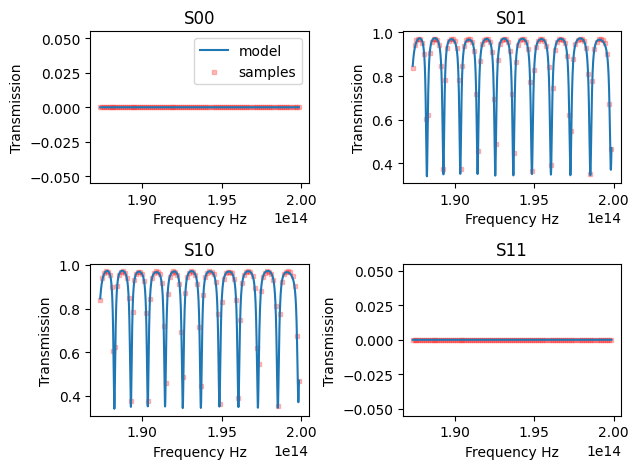

In [2]:
netlist = {
    "instances": {
        "wg": "waveguide",
        "hr": "half_ring",
    },
    "connections": {
        "hr,o2":"wg,o0",
        "hr,o3":"wg,o1",
    },
    "ports":{
        "o0":"hr,o0",
        "o1":"hr,o1",
    }
}
circuit, info = sax.circuit(
    netlist=netlist,
    models={
        "waveguide": ideal.waveguide,
        "half_ring": ideal.coupler,
    }
)

num_measurements = 100
model_order =50
wvl = np.linspace(1.5, 1.6, num_measurements)
s = circuit(wl=wvl, wg={"length": 77.0, "loss": 100})
print(type(s))
model = CVFModel(wvl,s,50)
model.plot_frequency_domain_model()